In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pickle import dump

# Concatenate all arctic ice files into one dataset
filepath = './Arctic_Ice_Monthly/N_07_extent_v3.0.csv'
all_files = glob.glob(filepath)
dataframe = []
for filename in all_files:
    df = pd.read_csv(filename)
    dataframe.append(df)
final_dataset = pd.concat(dataframe, ignore_index=True)
print(final_dataset)

    year   mo      data-type   region   extent     area
0   1979    7        Goddard        N    10.31     6.69
1   1980    7        Goddard        N    10.10     6.53
2   1981    7        Goddard        N    10.27     6.31
3   1982    7        Goddard        N    10.37     6.87
4   1983    7        Goddard        N    10.57     6.86
5   1984    7        Goddard        N     9.98     6.30
6   1985    7        Goddard        N     9.74     5.99
7   1986    7        Goddard        N    10.15     6.62
8   1987    7        Goddard        N    10.33     6.55
9   1988    7        Goddard        N     9.81     7.01
10  1989    7        Goddard        N    10.13     7.33
11  1990    7        Goddard        N     9.25     6.52
12  1991    7        Goddard        N     9.51     6.76
13  1992    7        Goddard        N    10.32     7.22
14  1993    7        Goddard        N     9.48     6.28
15  1994    7        Goddard        N     9.93     6.92
16  1995    7        Goddard        N     8.99  

In [2]:
def preProcess(X):

    # Replace strings with numbers in dataset
    '''
    X = X.rename(columns={'    data-type': 'data-type'})
    X = X.rename(columns={' region': 'region'})
    datatype_category_mapping = {'      Goddard': 1, '      NRTSI-G': 2}
    region_category_mapping = {'      N': 1}
    X['data-type'] = X['data-type'].replace(datatype_category_mapping)
    X['region'] = X['region'].replace(region_category_mapping)
    '''

    # Drop necessary columns from the dataset
    X.drop(['    data-type', ' region'], axis=1, inplace=True)
    print(X)
    '''
    # Remove missing data
    values_to_drop = ['-9999']
    for col in X.columns:
        X = X[~X[col].isin(values_to_drop)]

    # Normalise the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    #filename = "savedDataRegression/scaler.pkl"
    #with open(filename, "wb") as f:
    #    dump(scaler, f)

    fig, ax = plt.subplots(1, figsize=(10, 4))
    sns.boxplot(data=Xs, ax=ax)
    plt.xticks(np.arange(len(X.columns)), X.columns)
    plt.title("Normalised Features")
    plt.show()
    ''' 

    return pd.DataFrame(X, columns=X.columns)

In [3]:
processed_dataset = preProcess(final_dataset)
processed_dataset.head()

    year   mo   extent     area
0   1979    7    10.31     6.69
1   1980    7    10.10     6.53
2   1981    7    10.27     6.31
3   1982    7    10.37     6.87
4   1983    7    10.57     6.86
5   1984    7     9.98     6.30
6   1985    7     9.74     5.99
7   1986    7    10.15     6.62
8   1987    7    10.33     6.55
9   1988    7     9.81     7.01
10  1989    7    10.13     7.33
11  1990    7     9.25     6.52
12  1991    7     9.51     6.76
13  1992    7    10.32     7.22
14  1993    7     9.48     6.28
15  1994    7     9.93     6.92
16  1995    7     8.99     6.16
17  1996    7    10.16     7.44
18  1997    7     9.41     6.50
19  1998    7     9.42     6.45
20  1999    7     9.49     6.55
21  2000    7     9.51     6.39
22  2001    7     9.07     6.29
23  2002    7     9.27     6.44
24  2003    7     9.21     6.15
25  2004    7     9.43     6.51
26  2005    7     8.65     5.90
27  2006    7     8.46     5.79
28  2007    7     7.94     5.13
29  2008    7     8.68     6.06
30  2009

,year,mo,extent,area
0,1979,7,10.31,6.69
1,1980,7,10.10,6.53
2,1981,7,10.27,6.31
3,1982,7,10.37,6.87
4,1983,7,10.57,6.86


In [4]:

def linearRegressionModel(df):
    # Create a linear regression model to predict arctic ice extent using the year as input
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    # Split the data into features (independent variables) and target (dependent variable)
    X = df['year']
    X_reshaped = X.values.reshape(-1,1)
    Y = df[' extent']

    # Split the data into training and testing -> to be able to evaluate the model based on predictions
    X_train, X_test, y_train, y_test = train_test_split(X_reshaped, Y, test_size=0.2, random_state=1)

    # Create linear regression model and fit it to the training data
    lin_reg = LinearRegression()
    #lin_reg.fit(X_train,y_train)
    lin_reg.fit(X_reshaped,Y)

    # Evaluate the model
    #y_pred = lin_reg.predict(X_test)
    y_pred = lin_reg.predict(X_reshaped)
    #mse = mean_squared_error(y_test, y_pred)
    mse = mean_squared_error(Y, y_pred)
    print(mse)

    # Visualise the regression line with the data values
    plt.scatter(X, Y, color='blue', label='actual data')
    #X_range = np.linspace(df['year'].min(), df['year'].max(), 100)
    plt.plot(X, y_pred, color='red', label='Best-fit line')

    plt.xlabel('Year')
    plt.ylabel('Artic Ice Extent')
    plt.title('Linear Regression: Actual data vs Predicted line')
    plt.legend()

#plt.plot(X_range, y_pred, color='red', label='Best-fit line')

0.13683414551310236


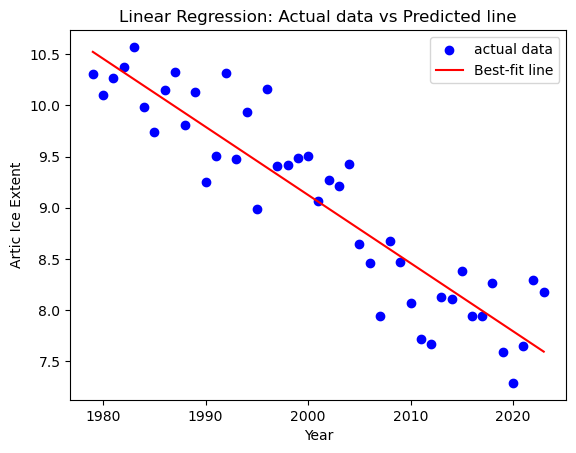

In [5]:
linearRegressionModel(processed_dataset)